In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/googleplaystore.csv")

In [ ]:
#Data Prepration
df.columns


Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
df.duplicated().sum()

np.int64(483)

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.dtypes

,0
App,object
Category,object
Rating,float64
Reviews,object
Size,object
Installs,object
Type,object
Price,object
Content Rating,object
Genres,object


In [ ]:
df_copy = df.copy()

In [ ]:
#resetting the index
df_copy.reset_index(drop = True , inplace=True)

In [ ]:
df_copy[~df_copy.Reviews.str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9990,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
df_copy = df_copy.drop(df_copy.index[9990])

In [ ]:
df_copy.duplicated().sum()

np.int64(0)

In [ ]:
df_copy['Reviews'] = df_copy['Reviews'].astype(int)

In [ ]:
#1MB = 1024 KB

def size_process(item):
  if str(item)[-1] == 'M':
    res = float(str(item).replace("M",""))
    res = res*1024
    return res
  elif str(item)[-1] == 'k':
    res = float(str(item).replace("k",""))
    return res
  else:
    return str(np.nan)


In [ ]:
size_process("19M")

19456.0

In [ ]:
df_copy["Size"] = df_copy["Size"].apply(size_process)

In [ ]:
df_copy.Size = df_copy.Size.astype(float)

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10357 entries, 0 to 10357
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          8892 non-null   float64
 3   Reviews         10357 non-null  int64  
 4   Size            8831 non-null   float64
 5   Installs        10357 non-null  object 
 6   Type            10356 non-null  object 
 7   Price           10357 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10357 non-null  object 
 11  Current Ver     10349 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.1+ MB


In [ ]:
df_copy["Installs"] = df_copy["Installs"].str.replace("+","").str.replace(",","")

In [ ]:
char_to_remove = ['+',',','$']
cols_to_remove = ['Price','Installs']

for char in char_to_remove:
  for col in cols_to_remove:
    df_copy[col] = df_copy[col].str.replace(char,"")

In [ ]:
df_copy["Installs"] = df_copy["Installs"].astype(int)
df_copy["Price"] = df_copy["Price"].astype(float)

In [ ]:
df_copy["Last Updated"] = pd.to_datetime(df_copy["Last Updated"])

In [ ]:
df_copy["day"] = df_copy["Last Updated"].dt.day
df_copy["month"] = df_copy["Last Updated"].dt.month
df_copy["year"] = df_copy["Last Updated"].dt.year

In [ ]:
# df_copy.drop(["Last Updated"],axis=1,inplace=True)

In [ ]:
df_copy["Android Ver"].str.replace(" and up","").str.replace("Varies with device","")

,Android Ver
0,4.0.3
1,4.0.3
2,4.0.3
3,4.2
4,4.4
...,...
10353,4.1
10354,4.1
10355,2.2
10356,


In [ ]:
df_copy =df_copy.drop_duplicates(subset = ["App"] , keep="first")

In [ ]:
#EDA Exploratory Data Analysis

categorial_features = [feature for feature in df_copy.columns if df_copy[feature].dtype == 'O']

In [ ]:
numerical_features = [feature for feature in df_copy.columns if df_copy[feature].dtype!='O']

In [ ]:
numerical_features

['Rating',
 'Reviews',
 'Size',
 'Installs',
 'Price',
 'Last Updated',
 'day',
 'month',
 'year']

In [ ]:
# for categorial data we make >> freq plot , bar . plot , pie chart
# numerical data >> histogram , distplot , boxplot , line chart , pairplot , scatter plot



In [ ]:
#categorial feature analysis
# for col in categorial_features :
#   {df_copy[col].value_counts(normalize=True)*100}


In [ ]:
df_copy["Android Ver"].value_counts(normalize = True)*100

,proportion
Android Ver,
4.1 and up,22.802112
4.0.3 and up,14.445480
4.0 and up,13.306410
Varies with device,10.251631
4.4 and up,8.470540
2.3 and up,6.378793
5.0 and up,5.301854
4.2 and up,3.852128
2.3.3 and up,2.826965


In [ ]:
df_copy["Type"].value_counts(normalize=True)*100

,proportion
Type,
Free,92.172292
Paid,7.827708


<Axes: xlabel='Type', ylabel='count'>

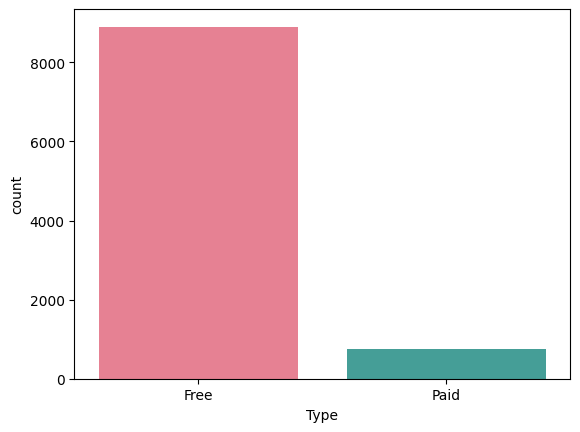

In [ ]:
sns.countplot(x=df_copy["Type"] , palette="husl")

<Axes: xlabel='Content Rating', ylabel='count'>

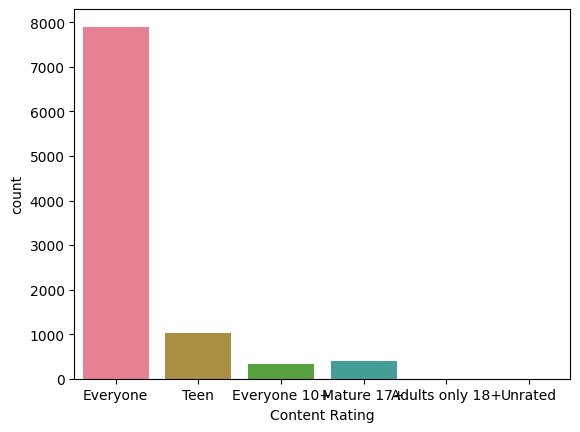

In [ ]:
palette = sns.color_palette("husl")
sns.countplot(x="Content Rating", data=df_copy, palette=palette)

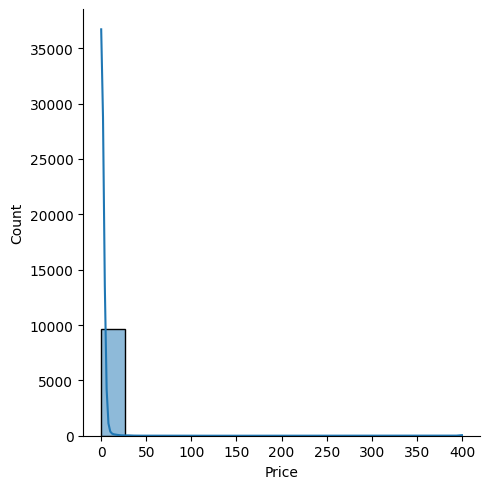

In [ ]:
#numerial features

sns.displot(df_copy["Price"] , kde = True)

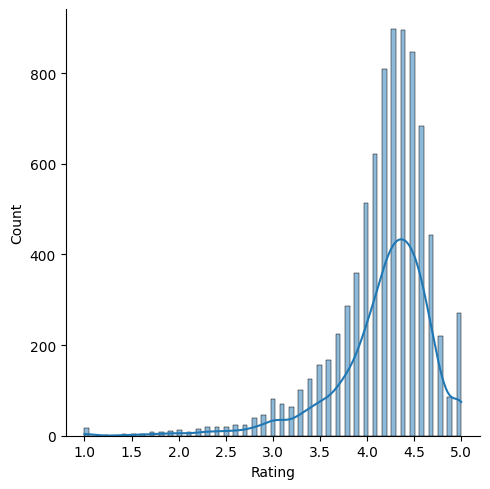

In [ ]:
sns.displot(df_copy["Rating"] , kde = True)

<Axes: xlabel='Rating', ylabel='Density'>

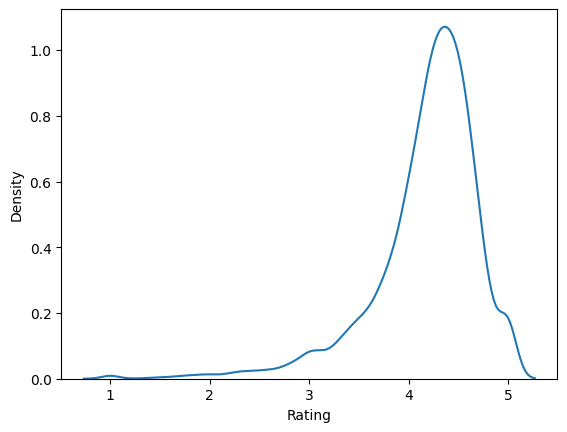

In [ ]:
sns.kdeplot(df_copy["Rating"])

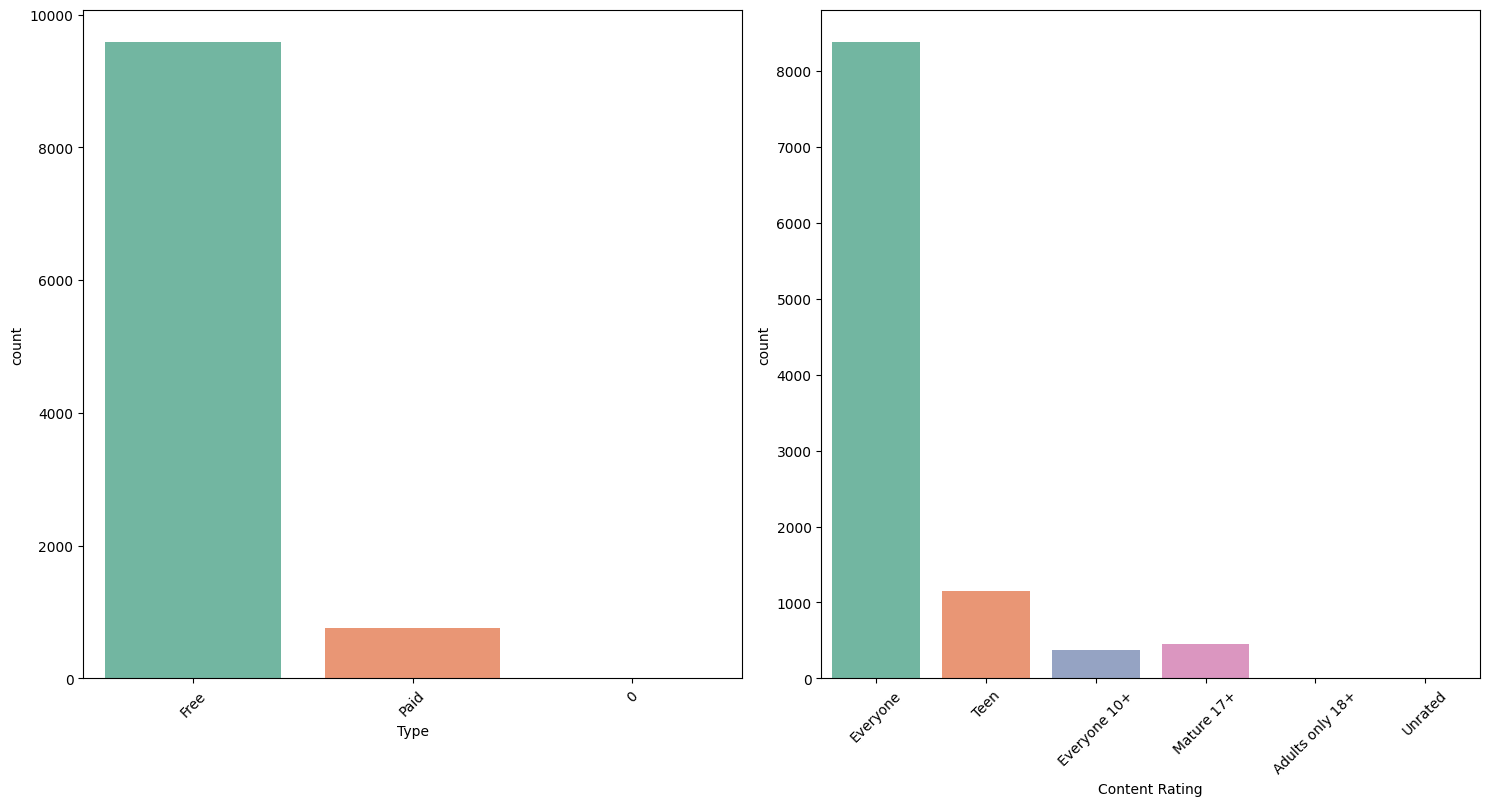

In [ ]:
plt.figure(figsize=(15,15))
category = ["Type", "Content Rating"]
for i in range(0,len(category)):
  plt.subplot(2,2 , i+1)
  sns.countplot(x=df[category[i]] ,palette="Set2", data=df_copy)
  plt.xlabel(category[i])
  plt.xticks(rotation =45)
  plt.tight_layout()

<Axes: ylabel='count'>

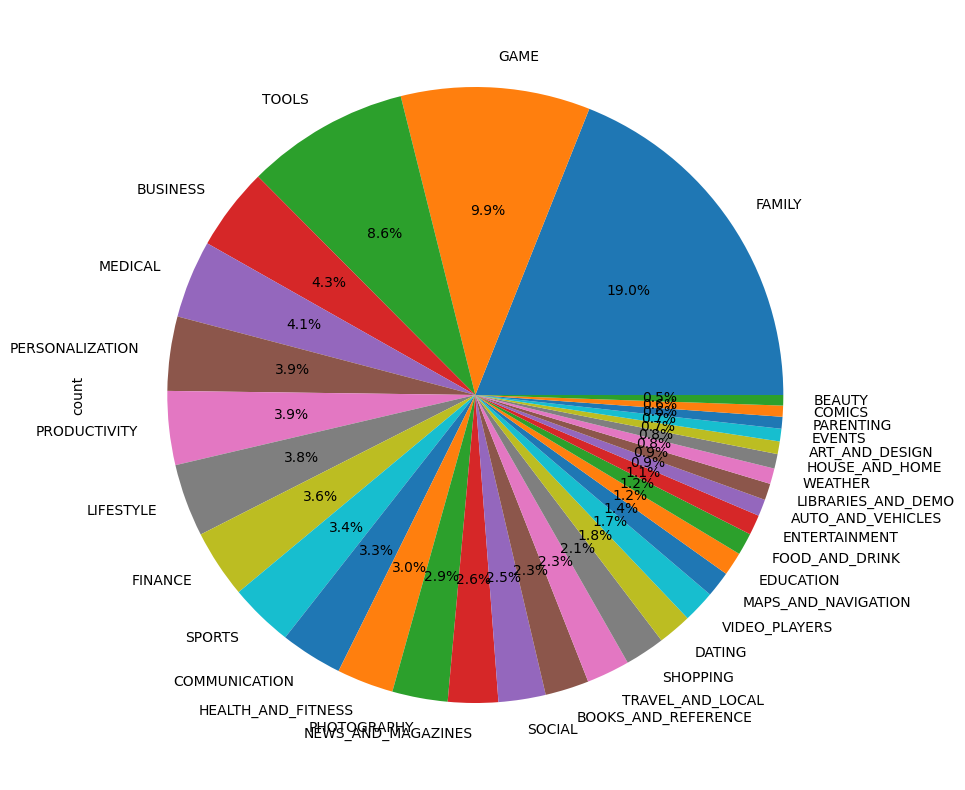

In [ ]:
#which category is the most popular category in the app ?
df_copy["Category"].value_counts().plot.pie(y=df["Category"],figsize=(10,10),autopct="%1.1f%%")
#>> Ans : Family

In [ ]:
#what is the top 10 most popular category
cat = df_copy["Category"].value_counts().head(10)
category = cat.reset_index()
category.columns = ["Category","Count"]

<Axes: xlabel='Category', ylabel='Count'>

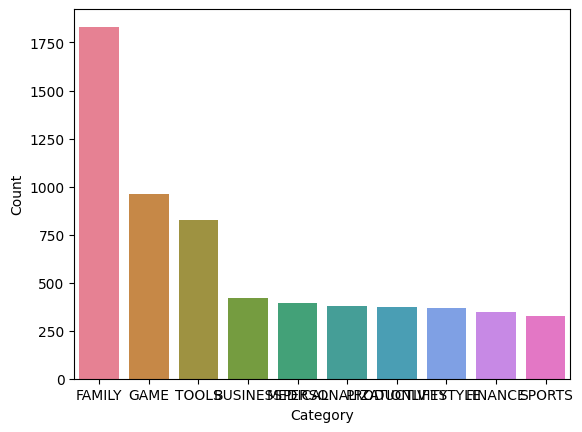

In [ ]:
sns.barplot(category , x = category['Category'] , y = category['Count'],palette="husl")

In [ ]:
#which category has the highest installation ?
df_copy.groupby("Category")["Installs"].sum().sort_values(ascending=False).head(10)

,Installs
Category,
GAME,13878924415
COMMUNICATION,11038276251
TOOLS,8001771915
PRODUCTIVITY,5793091369
SOCIAL,5487867902
PHOTOGRAPHY,4649147655
FAMILY,4427941505
VIDEO_PLAYERS,3926902720
TRAVEL_AND_LOCAL,2894887146


<Axes: xlabel='Installs', ylabel='Rating'>

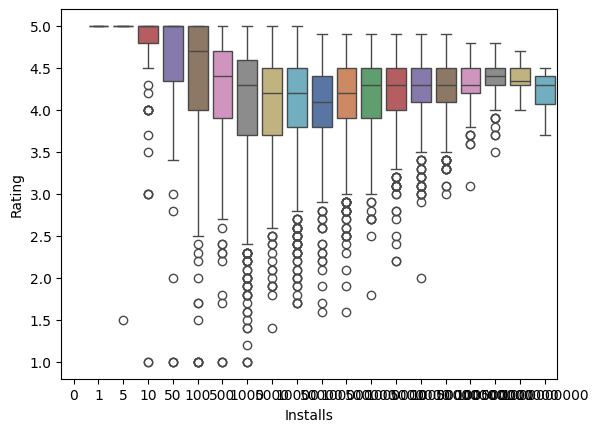

In [ ]:
sns.boxplot(x="Installs" , y="Rating" , data = df_copy , palette="deep")

In [ ]:
#what are the top 5 installed category apps in each type ?
df_copy.groupby("Category")["Installs"].sum().sort_values(ascending=False).head(5)
#which category app users are reviewing the most ?
df_copy.groupby('Category')["Reviews"].sum().sort_values( ascending=False).head(5)

,Reviews
Category,
GAME,622298709
COMMUNICATION,285811368
TOOLS,229356578
SOCIAL,227927801
FAMILY,143825488
